In [6]:
from filterpy.kalman import EnsembleKalmanFilter as EnKF
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
n = 1
m = 1
A = np.eye(n,n)
H = np.eye(m, n)
Q = np.eye(n) * 1
R = np.eye(m)
np.random.seed(0)

# Initial state and covariance
x0 = np.zeros(n)
P0 = np.eye(n) 

# Synthetic measurements
n_steps = 100
x = np.zeros((n, n_steps))
y = np.zeros((m, n_steps))
x[:, 0] = x0
y[:, 0] = H @ x0 + np.random.multivariate_normal(np.zeros(m), R)
for t in range(1, n_steps):
    x[:, t] = A @ x[:, t-1] + np.random.multivariate_normal(np.zeros(n), Q)
    y[:, t] = H @ x[:, t] + np.random.multivariate_normal(np.zeros(m), R)

# System dynamics
def f(x, dt): 
    return A @ x

# Measurements
def h(x): 
    return H @ x

# Ensemble Kalman Filter
enkf = EnKF(x=x0, P=P0, dim_z=m, dt=1., N=1000, hx=h, fx=f)

#enkf.Q = np.random.multivariate_normal(np.zeros(n), Q) * 10

state_estimates = np.zeros((n, n_steps))
covariance_matrices = np.zeros((n, n, n_steps))

# Simulation
for t, yi in enumerate(y.T):
    enkf.predict()
    enkf.update(yi, R = 1)
    state_estimates[:, t] = enkf.x
    covariance_matrices[:, :, t] = enkf.P

# uncertaitny boudns
standard_deviations = np.zeros((n, n_steps))
for t in range(n_steps):
    standard_deviations[:, t] = np.sqrt(np.diag(covariance_matrices[:, :, t]))

# # Print
# for t in range(n_steps):
#     print(f"Time step {t}: {state_estimates[:, t]}")


In [7]:
y[0]

array([ 1.76405235,  1.37889519,  4.5086084 ,  2.61386095,  1.40919647,
        2.06705739,  4.13832505,  3.94282558,  5.32671575,  3.94054611,
        0.22039285,  4.29143746,  4.95459087,  1.27622909,  2.57606593,
        2.66759292,  2.00302226,  0.56209939,  2.29665119,  1.88141354,
        0.91788464, -1.15985052,  1.98754288,  0.8063254 ,  1.22271327,
        1.72840428,  2.4999682 ,  1.80195893,  2.32499025,  1.92662283,
        1.52574331,  1.02550431,  0.28979413, -1.91961129, -0.73392905,
        0.95440527,  1.4936983 , -0.47818656, -2.43613544, -2.45574049,
       -3.25317246, -0.72153369, -1.23518762,  0.35122893, -2.0782281 ,
       -0.35620069,  1.4776963 ,  2.60242676,  2.96313355,  4.86541611,
        7.02364408,  2.52224932,  3.58900763,  6.29213324,  7.88123943,
        9.30637116,  7.48363117,  9.98691844, 12.00463017, 11.51644748,
       12.20100031, 11.02341217, 11.35699203, 11.4667718 , 14.42348383,
       13.38873484, 14.02356744, 14.09388458, 15.98275477, 15.59

In [8]:
state_estimates

array([[ 1.08797681,  1.27378873,  3.23661866,  2.80622234,  1.9743666 ,
         1.99937741,  3.35615613,  3.75811112,  4.69949628,  4.27368773,
         1.828008  ,  3.2862634 ,  4.29969744,  2.39787952,  2.5055114 ,
         2.59372534,  2.22218286,  1.14122553,  1.88565697,  1.88547923,
         1.29594169, -0.20695993,  1.14695955,  0.90529632,  1.09703638,
         1.50324587,  2.10985947,  1.9204863 ,  2.1520441 ,  2.01238147,
         1.67047821,  1.27673904,  0.66615703, -0.9219162 , -0.81380817,
         0.28292278,  1.01716603,  0.12797514, -1.44892546, -2.03238495,
        -2.78041639, -1.49166129, -1.28481643, -0.2470052 , -1.36551277,
        -0.72793662,  0.64151279,  1.87513337,  2.58393178,  3.99535353,
         5.81853957,  3.82998202,  3.67879545,  5.2972399 ,  6.85699855,
         8.30214436,  7.81494108,  9.16963992, 10.93425741, 11.29648556,
        11.85742531, 11.32754832, 11.34183811, 11.44434721, 13.36315718,
        13.41028292, 13.81338586, 13.99792293, 15.2

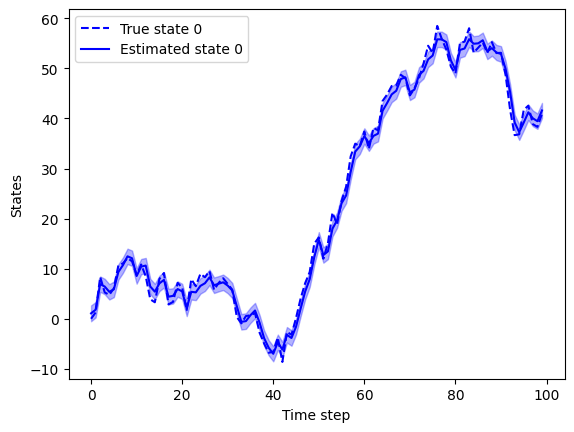

In [ ]:
colors = ['blue', 'green', 'red']  # Add more colors if there are more states

# Create a new figure
plt.figure()

# Plot state estimates with uncertainty bounds
for i in range(n):
    plt.plot(x[i, :], color=colors[i], linestyle = '--' , label=f"True state {i}")
    plt.plot(state_estimates[i, :], color=colors[i], label=f"Estimated state {i}")
    plt.fill_between(
        np.arange(n_steps),
        state_estimates[i, :] - 1.96 * standard_deviations[i, :],
        state_estimates[i, :] + 1.96 * standard_deviations[i, :],
        color=colors[i], alpha=0.3  # Lighter color for uncertainty bounds
    )

plt.xlabel('Time step')
plt.ylabel('States')
plt.legend()
plt.show()